<a href="https://colab.research.google.com/github/yasminenavishaa/Machine-Learning/blob/main/Pertemuan11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Job Sheet 11: Convolutional Neural Network (CNN) **
Nama : Yasmine Navisha Andhani

Kelas : D4-TI / 3G

NIM : 2141720047

Github : https://github.com/yasminenavishaa/Machine-Learning

## **Praktikum 1: Klasifikasi Kucing dan Anjing**
**Deskripsi**
Pada praktikum ini kita akan membuat model klasifikasi CNN sederhana pada kasus citra kucing dan anjing.

**Dataset**
Dataset merupakan data citra anjing dan kucing yang telah dibagi menjadi data training dan data testing.

### **Langkah 1 - Import Library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

### **Langkah 2 - Pra Pengolahan Data**
Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

#### Langkah 2.1. Pra Pengolahan Data Training

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/SEMESTER 5/Machine Learning/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


#### Langkah 2.2. Pra Pengolahan Data Testing

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/SEMESTER 5/Machine Learning/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


### **Langkah 3 - Pembuatan Model CNN**

#### 3.1. - Inisiasi Model CNN

In [ ]:
cnn = tf.keras.models.Sequential()

#### 3.2. - Pembuatan Layer Konvolusi 1

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#### Langkah 3.3 - Pembuatan Layer Pooling 1

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Langkah 3.5 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

#### Langkah 3.6 - Fully Connected Layer 1 (Input)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### Langkah 3.8 - Compile Model CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Penggunaan loss function binary crossentropy dikarenakan kita hanya melakukan klasifikasi pada dua kelas, yaitu kucing dan anjing.

### **Langkah 4 - Fit CNN**

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 4094s 16s/step - loss: 0.6637 - accuracy: 0.5889 - val_loss: 0.5968 - val_accuracy: 0.6975
Epoch 2/25
250/250 [==============================] - 40s 160ms/step - loss: 0.5915 - accuracy: 0.6876 - val_loss: 0.5558 - val_accuracy: 0.7200
Epoch 3/25
250/250 [==============================] - 39s 156ms/step - loss: 0.5588 - accuracy: 0.7111 - val_loss: 0.5288 - val_accuracy: 0.7365
Epoch 4/25
250/250 [==============================] - 39s 156ms/step - loss: 0.5260 - accuracy: 0.7380 - val_loss: 0.5504 - val_accuracy: 0.7120
Epoch 5/25
250/250 [==============================] - 44s 177ms/step - loss: 0.5016 - accuracy: 0.7535 - val_loss: 0.4924 - val_accuracy: 0.7730
Epoch 6/25
250/250 [==============================] - 39s 155ms/step - loss: 0.4855 - accuracy: 0.7606 - val_loss: 0.4999 - val_accuracy: 0.7770
Epoch 7/25
250/250 [==============================] - 39s 157ms/step - loss: 0.4607 - accuracy: 0.7806 - val_loss: 0.4714 - val_ac

### Langkah 5 - Prediksi dengan 1 Citra
Pada langkah ini, kita akan mencoba melakukan prediksi pada 1 citra anjing dan kucing.

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/SEMESTER 5/Machine Learning/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 162ms/step


## Praktikum 2: Klasifikasi Multi-label dengan Data CIFAT

**Deskripsi**

Pada praktikum ini kita akan membuat model CNN untuk mengklasifikasikan 10 objek dari dataset CIFAR. Dataset terdiri dari 60.000 citra dan setiap label terdiri dari 6.000 citra. Dataset telah dibagi menjadi 50.000 data training dan 10.000 data testing.

### **Langkah 1 - Load Library**

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### **Langkah 2 - Unduh Dataset CIFAR**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 13s 0us/step


### **Langkah 3 - Verifikasi Data**

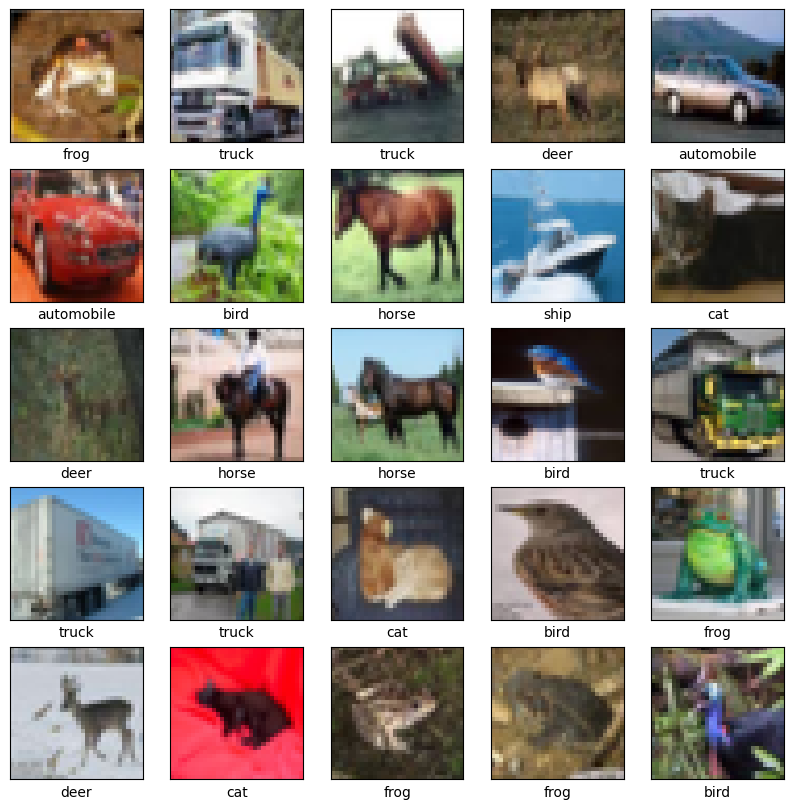

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(train_images[i])
 # The CIFAR labels happen to be arrays,
 # which is why you need the extra index
 plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Langkah 4 - Buat Model CNN

#### Langkah 4.1. - Buat Layer Konvolusi

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#### Langkah 4.2. - Cek Arsitektur Konvolusi

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

#### Langkah 4.3. - Tambahkan Layer Fully Connected

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#### Langkah 4.4. - Cek Arsitektur Model CNN

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

#### Langkah 4.5. - Compile Model CNN

In [ ]:
model.compile(optimizer='adam',
 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
 metrics=['accuracy'])

### **Langkah 5 - Fit Model**

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 13s 7ms/step - loss: 1.5128 - accuracy: 0.4498 - val_loss: 1.2308 - val_accuracy: 0.5554
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1586 - accuracy: 0.5897 - val_loss: 1.0854 - val_accuracy: 0.6174
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0142 - accuracy: 0.6430 - val_loss: 0.9746 - val_accuracy: 0.6585
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9198 - accuracy: 0.6781 - val_loss: 1.0506 - val_accuracy: 0.6338
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8486 - accuracy: 0.7041 - val_loss: 0.9154 - val_accuracy: 0.6765
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7914 - accuracy: 0.7212 - val_loss: 0.9224 - val_accuracy: 0.6845
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7391 - accuracy: 0.7408 - val_loss: 0.8724 - val_accurac

### **Langkah 6 - Evaluasi Model**

313/313 - 1s - loss: 0.8915 - accuracy: 0.7054 - 693ms/epoch - 2ms/step


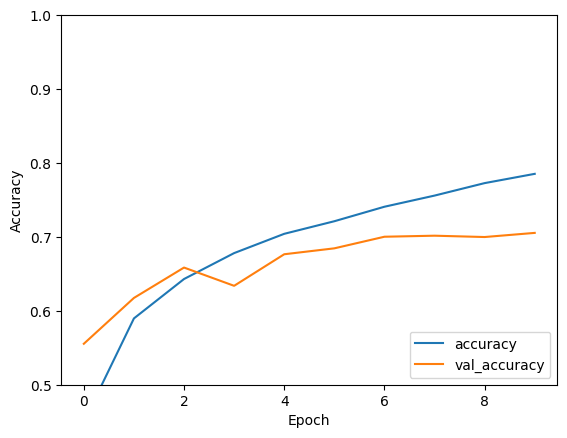

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

### **Langkah 7 - Cetak Hasil Akurasi**

In [ ]:
print(test_acc)

0.7053999900817871


****
## **Tugas Praktikum**


**Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%**

1. Import Library



In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2. Load CIFAR-10 dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


3. Normalisasikan nilai piksel menjadi antara 0 dan 1

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

4. Buat model CNN

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.35))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                        

 7. Lakukan compile pada model

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

8. Melatih model

In [6]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 49s 21ms/step - loss: 1.5779 - accuracy: 0.4608 - val_loss: 1.5470 - val_accuracy: 0.4515
Epoch 2/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9601 - accuracy: 0.6631 - val_loss: 0.8354 - val_accuracy: 0.7121
Epoch 3/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7602 - accuracy: 0.7379 - val_loss: 0.7252 - val_accuracy: 0.7448
Epoch 4/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6491 - accuracy: 0.7774 - val_loss: 0.7396 - val_accuracy: 0.7494
Epoch 5/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.5584 - accuracy: 0.8128 - val_loss: 0.6088 - val_accuracy: 0.7911
Epoch 6/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.4828 - accuracy: 0.8365 - val_loss: 0.5828 - val_accuracy: 0.8061
Epoch 7/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.4250 - accuracy: 0.8568 - val_loss: 0.4859 -

9. Evaluasi hasil model

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 2s - loss: 0.5394 - accuracy: 0.8537 - 2s/epoch - 6ms/step
Test accuracy: 0.8536999821662903


10. Plot visualisasi

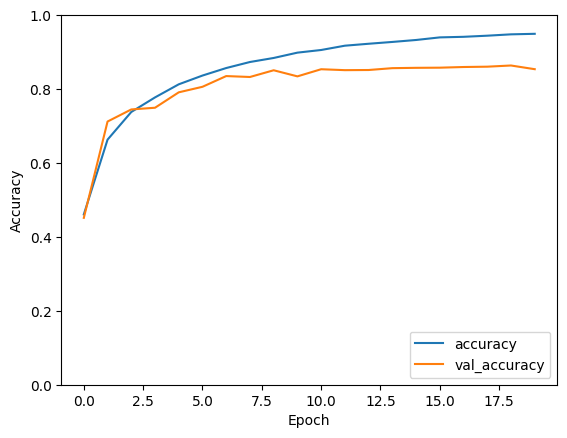

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

**Model CNN untuk klasifikasi dataset MNIST.**

1. Import Library

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2. Load Mnist dataset

In [10]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


3. Normalisasikan nilai piksel menjadi antara 0 dan 1

In [11]:
train_images, test_images = train_images / 255.0, test_images / 255.0

4. Buat model CNN

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

5. Lakukan compile pada model

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

6. Melatih model

In [14]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1567 - accuracy: 0.9507 - val_loss: 0.0435 - val_accuracy: 0.9870
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0466 - accuracy: 0.9850 - val_loss: 0.0416 - val_accuracy: 0.9864
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0390 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0359 - val_accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 0.0358 - val_accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0171 - accuracy: 0.9942 - val_loss: 0.0303 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0138 - accuracy: 0.9957 - val_loss: 0.0278 - val_accura

7. Evaluasi hasil model

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.0378 - accuracy: 0.9919 - 654ms/epoch - 2ms/step
Test accuracy: 0.9919000267982483


8. Plot visualisasi

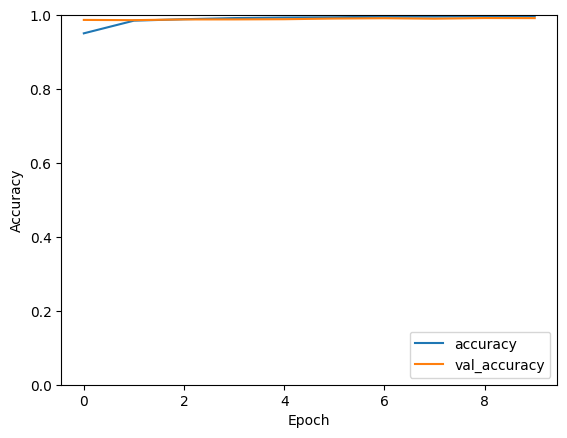

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()